Example notebook showing how to use the Ensemble sampler (currently in development)

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import emcee
import corner

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [4]:
from nnest import EnsembleSampler
from nnest.likelihoods import *
from nnest.priors import *

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# Likelihood
#like = Himmelblau(2)
#prior = UniformPrior(2, -5, 5)
like = Rosenbrock(2)
prior = UniformPrior(2, -2, 10)
#like = Gaussian(2, 0.9)
#prior = UniformPrior(2, -5, 5)
#like = Eggbox(2)
#prior = UniformPrior(2, -15, 15)
#like = GaussianShell(2)
#prior = UniformPrior(2, -3, 3)
#like = GaussianMix(2)
#prior = UniformPrior(2, -8, 8)
#like = DoubleGaussianShell(2, centers=[[-4.0, 0.0], [4.0, 0.0]], weights=[0.5, 1.0])
#prior = UniformPrior(2, [-7, -3], [7, 3])

In [7]:
sampler = EnsembleSampler(like.x_dim, like, flow='spline', prior=prior)

Creating directory for new run logs/test/run81
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [8]:
sampler.run(100, 100, bootstrap_iters=1)

[nnest.sampler] [INFO] Initial acceptance [0.3145]
[nnest.trainer] [INFO] Number of training samples [100]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0330] validation loss [0.3336]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0121] validation loss [0.2620]
[nnest.trainer] [INFO] Epoch [108] ran out of patience
[nnest.trainer] [INFO] Best epoch [58] validation loss [0.2329] train time (s) [3.3870]]


/Users/adammoss/opt/anaconda3/envs/nnest/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


[nnest.sampler] [INFO] Step [10] acceptance [0.4190] ncalls [1100]
[nnest.sampler] [INFO] Step [20] acceptance [0.3975] ncalls [2100]
[nnest.sampler] [INFO] Step [30] acceptance [0.4060] ncalls [3100]
[nnest.sampler] [INFO] Step [40] acceptance [0.4017] ncalls [4100]
[nnest.sampler] [INFO] Acceptance [0.4003] min ESS [0.4255] max ESS [1.2611] average jump [0.2114]
Removed no burn in
[nnest.trainer] [INFO] Number of training samples [190]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0366] validation loss [0.1613]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.0097] validation loss [-0.0332]
[nnest.trainer] [INFO] Epoch [133] ran out of patience
[nnest.trainer] [INFO] Best epoch [83] validation loss [-0.0434] train time (s) [7.4475]]
[nnest.sampler] [INFO] Step [10] acceptance [0.1560] ncalls [1100]
[nnest.sampler] [INFO] Step [20] acceptance [0.1640] ncalls [2100]
[nnest.sampler] [INFO] Step [30] acceptance [0.1880] ncalls [3100]
[nne

In [9]:
like.num_evaluations

11388

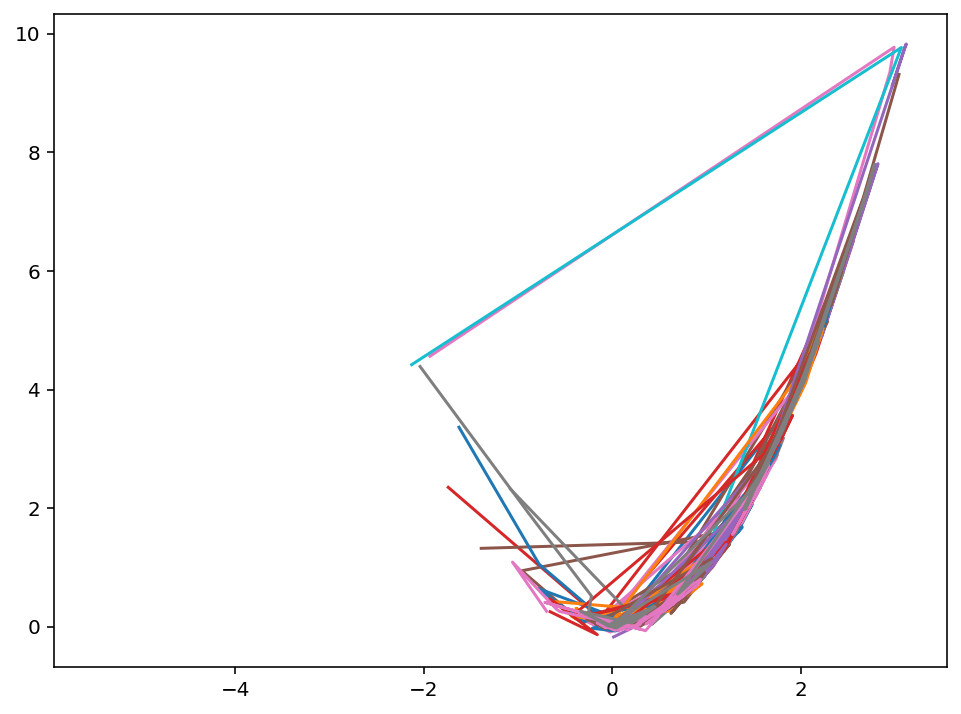

In [10]:
fig = plt.figure(figsize=(8,6))
for i in range(20):
    plt.plot(sampler.samples[i,:,0], sampler.samples[i,:,1])
plt.show()

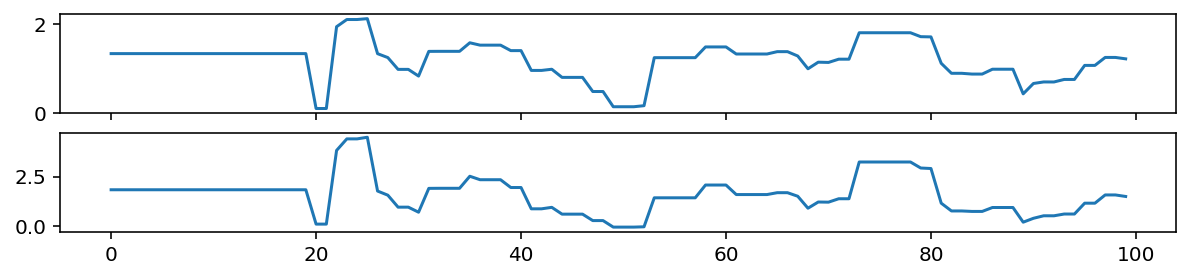

In [11]:
fig, ax = plt.subplots(like.x_dim, 1, figsize=(10, like.x_dim), sharex=True)
for i in range(like.x_dim):
    ax[i].plot(sampler.samples[0,:,i])
plt.show()

In [12]:
flat_samples = sampler.samples[:,50:,:]
flat_samples = flat_samples.reshape((-1, flat_samples.shape[2]))

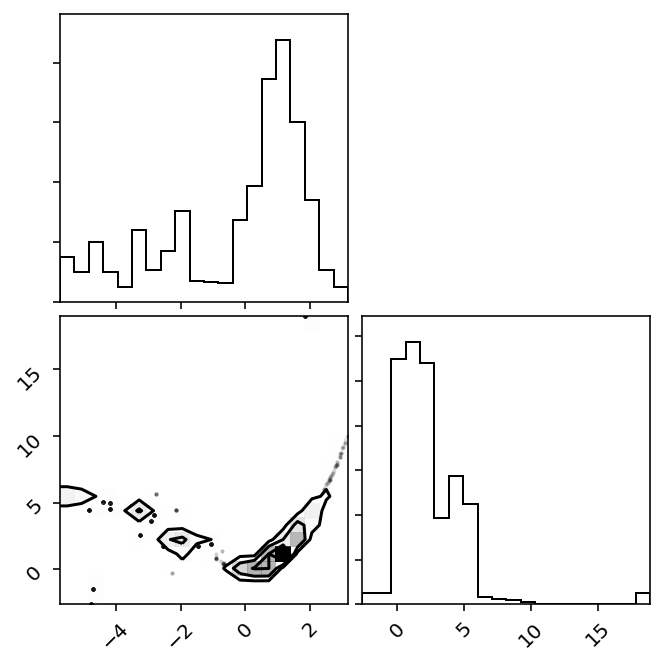

In [13]:
fig = corner.corner(flat_samples)

In [14]:
mc = MCSamples(samples=[sampler.samples[i, :, :].squeeze() for i in range(sampler.samples.shape[0])], 
               loglikes=[-sampler.loglikes[i, :].squeeze() for i in range(sampler.loglikes.shape[0])])

Removed no burn in


In [15]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())

124.44618087501873
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1     -4.6877172E-01  2.2742584E+00 -2.9685769E+00  2.3090498E+00  two   -5.4671328E+00  2.7366667E+00  two   -5.7169759E+00  3.1254414E+00  two     p_{1}
param2      2.5051819E+00  2.7242728E+00 -1.3734336E-01  4.7369297E+00  two   -5.6903171E-01  9.8666475E+00  two   -2.6186117E+00  1.8956787E+01  two     p_{2}



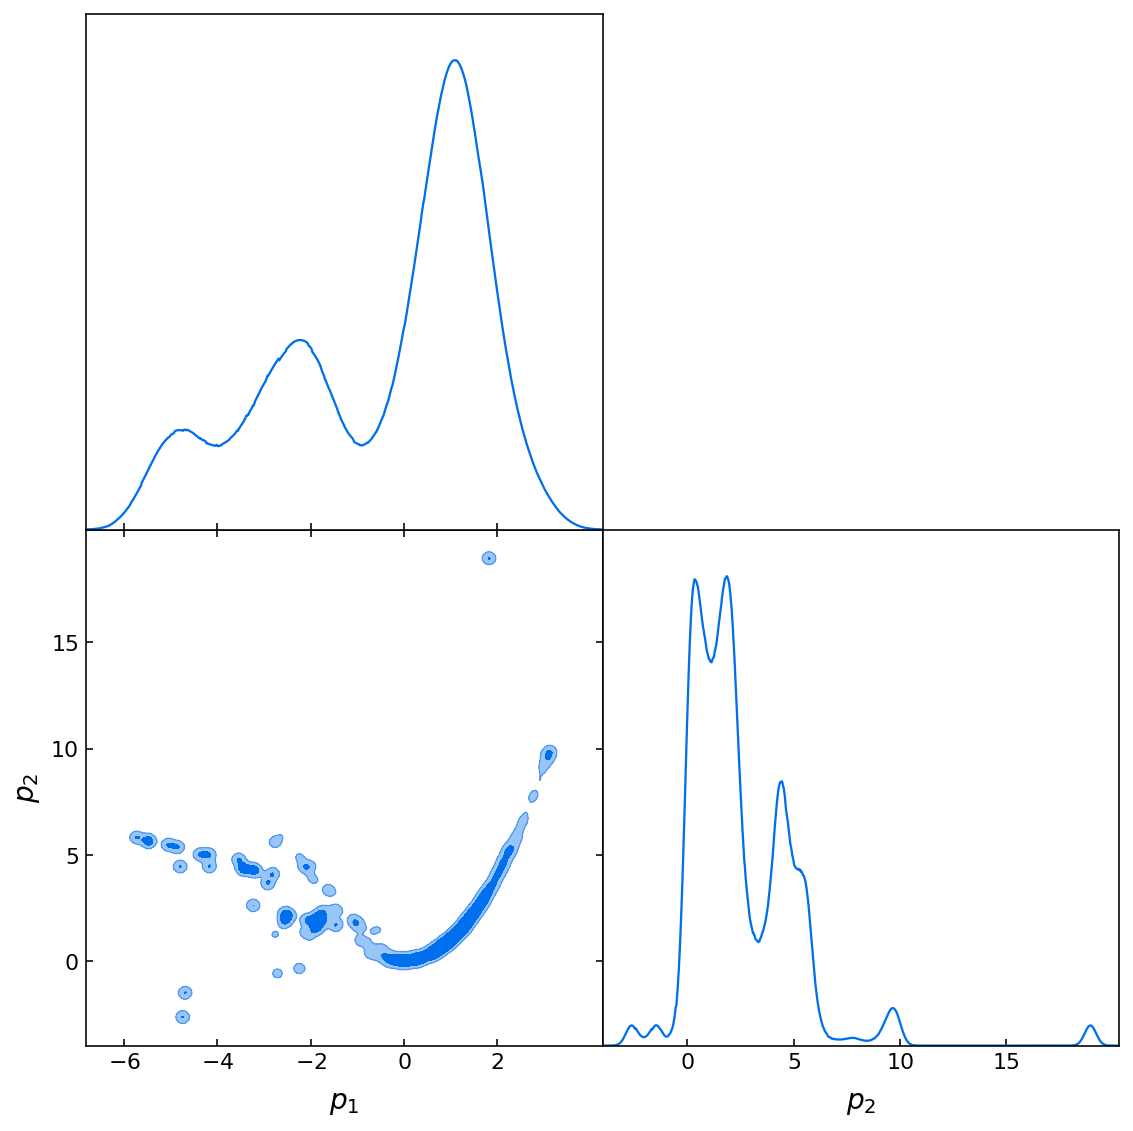

In [16]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)